# *Mössbauer*


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad


### Espectro de Fe: 

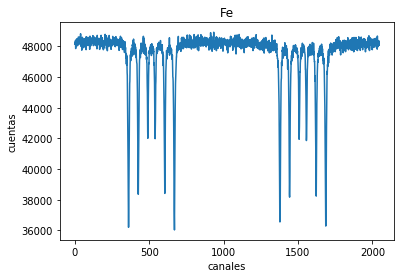

In [4]:

datosFe=pd.read_csv("aFe28.dat")
datosFe["canal"]=np.arange(len(datosFe))

xdatFe=datosFe.iloc[:,1]
ydatFe=datosFe.iloc[:,0]

plt.xlabel("canales")
plt.ylabel("cuentas")
plt.title("Fe")
plt.plot(xdatFe,ydatFe)
plt.show()


### Espectro de muestra desconocida:

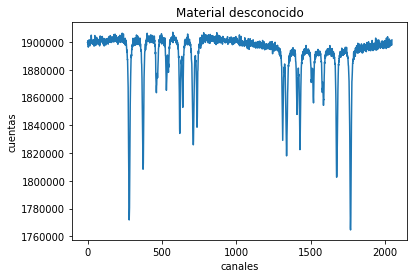

In [5]:
# espectro desconocido
datosDesc=pd.read_csv("mag_pasq.dat")
datosDesc["canal"]=np.arange(len(datosDesc))

xdatDesc=datosDesc.iloc[:,1]
ydatDesc=datosDesc.iloc[:,0]

plt.plot(xdatDesc,ydatDesc)
plt.xlabel("canales")
plt.ylabel("cuentas")
plt.title("Material desconocido")
plt.show()

# datosDesc

## Doblamiento de los espectros

### Suma de los espectros espejados del Fe:

In [6]:

Fe=pd.read_csv("aFe28.dat")
Fe_esp=Fe[::-1]   #espectro espejado

Fe_esp=Fe_esp.iloc[1025:] #hago los dos espectros desdoblados
Fe1=Fe.iloc[1025:]

Fe_esp=np.array(Fe_esp)   #los hago vectores para poder sumarlos componente a componente
Fe1=np.array(Fe1)

print(Fe_esp.shape, Fe1.shape) #verifico que tengan misma dimension

Fe=Fe_esp+Fe1  #los sumo

Fe=pd.DataFrame(Fe)       #lo paso de vector a lista
Fe["canal"]=np.arange(len(Fe))    #le agrego a la lista la columna de los canales


(1022, 1) (1022, 1)


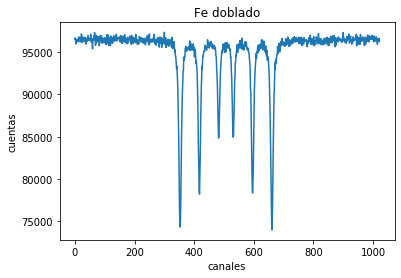

In [7]:
xFe=Fe.iloc[:,1]
yFe=Fe.iloc[:,0]

plt.xlabel("canales")
plt.ylabel("cuentas")
plt.title("Fe doblado")
plt.plot(xFe,yFe)
plt.show()



### Suma de los espectros espejados de la muestra desconocida:

In [8]:
desc=pd.read_csv("mag_pasq.dat")   #leemos el archivo con pandas
desc_esp= desc[::-1]    #espectro espejado
desc_esp= desc_esp.iloc[1025:]  #me quedaria la segunda parte del espectro original
desc=desc.iloc[1025:]   #me quedo con la primer parte del espectro original

desc=np.array(desc_esp)+np.array(desc)    #lo sumo como vectores asi suma componente a componente

desc=pd.DataFrame(desc)    #lo convierto en dataframe
desc["canal"]=np.arange(len(desc))   #le agregamos la columna de canal


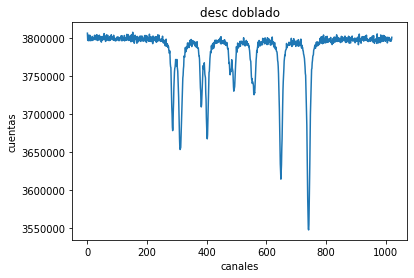

In [10]:
xdesc= desc.iloc[:,1]
ydesc= desc.iloc[:,0]
# xdesc=xdesc[::-1]

plt.xlabel("canales")
plt.ylabel("cuentas")
plt.title("desc doblado")
plt.plot(xdesc,ydesc)
plt.show()


### **Tomamos todos los picos individualmente y les ajustamos una Lorentziana:**

\begin{equation}
    P(E)=\frac{(\frac{\Gamma}{2})^2}{(E-E_{o})^2+(\frac{\Gamma}{2})^2}
\end{equation}

A estos picos les calculamos las integrales.

## Picos por separado del espectro de Fe:


### Pico 1 de Fe:

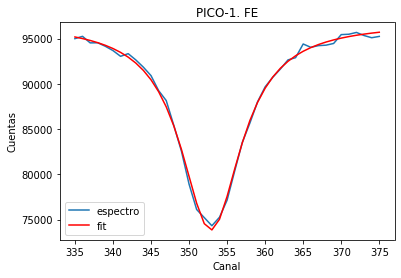

centro del pico = 352.8656047723356 ± 0.0017917733359611569
El valor de la integral del pico es : 2535114.537977681


In [11]:
# canales 343:375

Fe1= Fe.iloc[335:376,]    #python no incluye el ultimo canal

x=Fe1.iloc[:,1]
y=Fe1.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 360 , 10,-95000])

plt.plot(Fe1.iloc[:,1],Fe1.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-1. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico 2 de Fe:

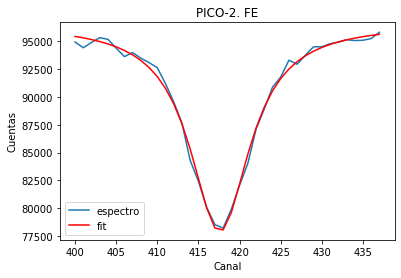

centro del pico = 417.59267012936374 ± 0.002935419426152294
El valor de la integral del pico es : 2354021.583696024


In [13]:
#PICO 2 de Fe, canales 414:437

Fe2=Fe.iloc[400:438,]   #python no incluye el ultimo canal

x=Fe2.iloc[:,1]
y=Fe2.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 425 , 10,-95000])

plt.plot(Fe2.iloc[:,1],Fe2.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-2. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO


def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
print("El valor de la integral del pico es :",I[0]) 

### Pico 3 de Fe:

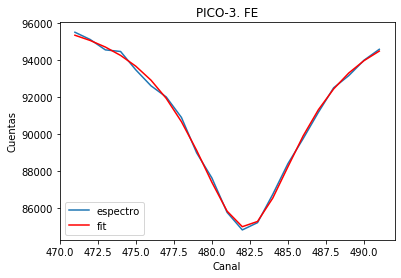

centro del pico = 482.2570506300819 ± 0.001294241218368753
El valor de la integral del pico es : 2469809.4294958967


In [12]:
#PICO 3 de Fe, canales 

Fe3=Fe.iloc[471:492,]   #(termine dejando mejor este intervalo)

x=Fe3.iloc[:,1]
y=Fe3.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 490 , 10,-95000])

plt.plot(Fe3.iloc[:,1],Fe3.iloc[:,0],label="espectro")   
plt.title("PICO-3. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))


#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
print("El valor de la integral del pico es :",I[0]) 

### Pico 4 de Fe:

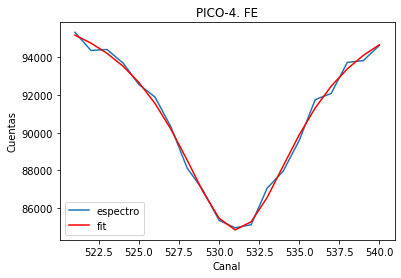

centro del pico = 531.0935182077868 ± 0.003829395888020369
El valor de la integral del pico es : 2658922.5595844025


In [15]:
# PICO 4 de Fe, canales 440:500

Fe4= Fe.iloc[521:541,]

x=Fe4.iloc[:,1]
y=Fe4.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 539 , 10,-95000])

plt.plot(Fe4.iloc[:,1],Fe4.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-4. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))


#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
print("El valor de la integral del pico es :",I[0]) 

### Pico 5 de Fe:

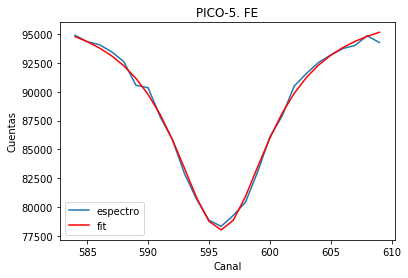

centro del pico = 595.9708950121374 ± 0.0026710974407467476
El valor de la integral del pico es : 2605127.1302895816


In [16]:
# PICO 5 Fe, canales 592:616

Fe5= Fe.iloc[584:610,]

x=Fe5.iloc[:,1]
y=Fe5.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 600 , 10,-95000])

plt.plot(Fe5.iloc[:,1],Fe5.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-5. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))


#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
print("El valor de la integral del pico es :",I[0]) 

### Pico 6 de Fe: 

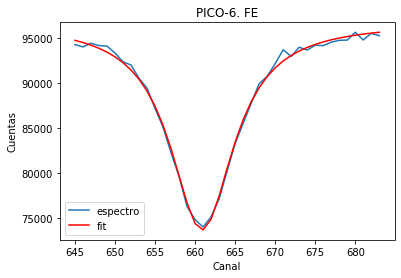

centro del pico = 660.8700736679939 ± 0.002103875533425402
El valor de la integral del pico es : 2513110.6462672465


In [17]:
#PICO 6 Fe, canales 652:684

Fe6=Fe.iloc[645:684,]

x=Fe6.iloc[:,1]
y=Fe6.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 668 , 10,-95000])

plt.plot(Fe6.iloc[:,1],Fe6.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-6. FE")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit')
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))


#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
print("El valor de la integral del pico es :",I[0]) 

## Picos por separado del espectro desconocido:


### Pico 1.1 y 1.2 de espectro desconocido: 

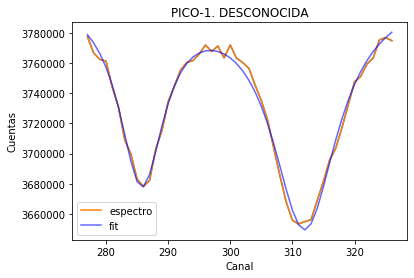

centro del pico1 = 285.7309940157053 ± 0.007481797965486377 , centro del pico2 = 311.992422034651 ± 0.006741666621031305
El valor de la integral del primer pico es: 100043204.18996128
El valor de la integral del segundo pico es: 144508056.8864334


In [50]:
#PICO1 espectro desconocido, canales 277,327

desc6=desc.iloc[277:327,]

plt.plot(desc6.iloc[:,1],desc6.iloc[:,0])
plt.title("PICO-1. DESCONOCIDA")
x=desc6.iloc[:,1]
y=desc6.iloc[:,0]

def Lorentz(x, a1, a2, x01 , x02 , b1 , b2 ,c):    #a=altura*5, x0
    return -(a1 * b1**2 / ((x-x01)**2 + b1**2) + a2 * b2**2 / ((x-x02)**2 + b2**2))+c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000,100000,285 , 311 , 10,10,-95000])

plt.plot(desc6.iloc[:,1],desc6.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()


print("centro del pico1 =",popt[2],"±",pcov[2,2],", centro del pico2 =",popt[3],"±",pcov[3,3])

#CALCULAMOS LAS INTEGRALES DE LOS PICOS

#INTEGRAMOS EL PRIMER PICO DEL PICO1
def integrand(x,c,d):
    return Lorentz(x,popt[0],0,popt[2],0,popt[4],0,popt[6])
c = popt[2]-3*popt[4]
d = popt[2]+3*popt[4]
I = quad(integrand, popt[2]-3*popt[4], popt[2]+3*popt[4],args=(c,d))
# print(I)
q=I[0]

#INTEGRAMOS EL SEGUNDO PICO DEL PICO1
def integrand(x,c,d):
    return Lorentz(x,0,popt[1],0,popt[3],0,popt[5],popt[6])
c = popt[3]-3*popt[5]
d = popt[3]+3*popt[5]
I = quad(integrand, popt[3]-3*popt[5], popt[3]+3*popt[5],args=(c,d))
# print(I)
w=I[0]
# print(popt)
print("El valor de la integral del primer pico es:",q)
print("El valor de la integral del segundo pico es:",w)


### Pico 2.1 y 2.2 de espectro desconocido: 

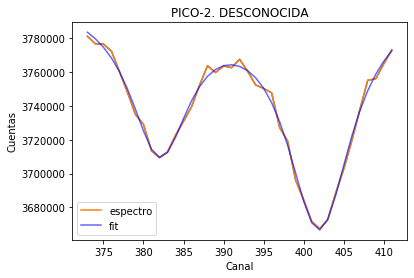

centro del pico1 = 382.03246136445597 ± 0.008144457918272504 , centro del pico2 = 401.94665353574317 ± 0.003762128790187341
El valor de la integral del primer pico es: 104405330.15863726
El valor de la integral del segundo pico es: 111396864.50271335


In [51]:
#PICO2espectro desconocido, canales 373:412

desc5=desc.iloc[373:412,]

plt.plot(desc5.iloc[:,1],desc5.iloc[:,0])
plt.title("PICO-2. DESCONOCIDA")
x=desc5.iloc[:,1]
y=desc5.iloc[:,0]

def Lorentz(x, a1, a2, x01 , x02 , b1 , b2 ,c):    #a=altura*5, x0
    return -(a1 * b1**2 / ((x-x01)**2 + b1**2) + a2 * b2**2 / ((x-x02)**2 + b2**2))+c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000,100000, 381,401 , 4,4,-95000])

plt.plot(desc5.iloc[:,1],desc5.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico1 =",popt[2],"±",pcov[2,2],", centro del pico2 =",popt[3],"±",pcov[3,3])

#CALCULAMOS LAS INTEGRALES DE LOS PICOS
def integrand(x,c,d):
    return Lorentz(x,popt[0],0,popt[2],0,popt[4],0,popt[6])
c = popt[2]-3*popt[4]
d = popt[2]+3*popt[4]
I = quad(integrand, popt[2]-3*popt[4], popt[2]+3*popt[4],args=(c,d))
# print(I)
e=I[0]

def integrand(x,c,d):
    return Lorentz(x,0,popt[1],0,popt[3],0,popt[5],popt[6])
c = popt[3]-3*popt[5]
d = popt[3]+3*popt[5]
I = quad(integrand, popt[3]-3*popt[5], popt[3]+3*popt[5],args=(c,d))
# print(I)
r=I[0]

print("El valor de la integral del primer pico es:",e)
print("El valor de la integral del segundo pico es:",r)


### Pico 3.1 y 3.2 de espectro desconocido: 

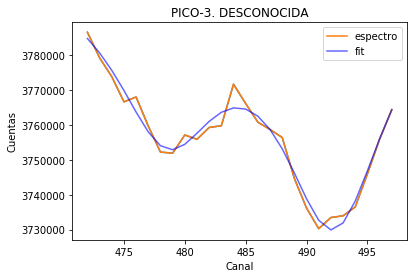

centro del pico1 = 478.4983813270644 ± 0.08894051161305656 , centro del pico2 = 492.2398722214022 ± 0.03522750069311306
El valor de la integral del primer pico es: 119761670.00526913
El valor de la integral del segundo pico es: 119614480.36281271


In [52]:
#PICO3 espectro desconocido, canales 472:498

desc4=desc.iloc[472:498,]

plt.plot(desc4.iloc[:,1],desc4.iloc[:,0])
plt.title("PICO-3. DESCONOCIDA")
x=desc4.iloc[:,1]
y=desc4.iloc[:,0]

def Lorentz(x, a1, a2, x01 , x02 , b1 , b2 ,c):    #a=altura*5, x0
    return -(a1 * b1**2 / ((x-x01)**2 + b1**2) + a2 * b2**2 / ((x-x02)**2 + b2**2))+c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000,100000, 478, 491 , 10,10,-95000])

plt.plot(desc4.iloc[:,1],desc4.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico1 =",popt[2],"±",pcov[2,2],", centro del pico2 =",popt[3],"±",pcov[3,3])

#CALCULAMOS LAS INTEGRALES DE LOS PICOS
def integrand(x,c,d):
    return Lorentz(x,popt[0],0,popt[2],0,popt[4],0,popt[6])
c = popt[2]-3*popt[4]
d = popt[2]+3*popt[4]
I = quad(integrand, popt[2]-3*popt[4], popt[2]+3*popt[4],args=(c,d))
# print(I)
t=I[0]

def integrand(x,c,d):
    return Lorentz(x,0,popt[1],0,popt[3],0,popt[5],popt[6])
c = popt[3]-3*popt[5]
d = popt[3]+3*popt[5]
I = quad(integrand, popt[3]-3*popt[5], popt[3]+3*popt[5],args=(c,d))
# print(I)
l=I[0]

print("El valor de la integral del primer pico es:",t)
print("El valor de la integral del segundo pico es:",l)



### Pico 4.1 y 4.2 de espectro desconocido: 

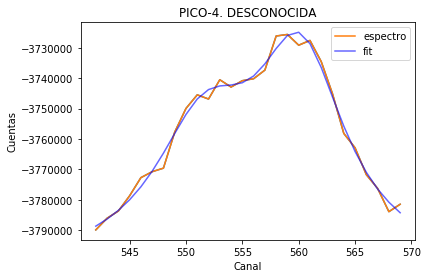

centro del pico1 = 551.6054718262162 ± 0.13166418212827205 , centro del pico2 = 560.155022138568 ± 0.042148726106453205
El valor de la integral del primer pico es: 124489042.41326074
El valor de la integral del segundo pico es: 110955586.95810142


In [53]:
# PICO4 espectro desconocido, canales 542:569

desc4=desc.iloc[542:570,]

x=desc4.iloc[:,1]
y=-desc4.iloc[:,0]   #lo tuvimos que dar vuelta sino no ajustaba

plt.plot(x,y)
plt.title("PICO-4. DESCONOCIDA")


def Lorentz(x, a1, a2, x01 , x02 , b1 , b2 ,c):    #a=altura*5, x0=centro, b= ancho
    return (a1 * b1**2 / ((x-x01)**2 + b1**2) + a2 * b2**2 / ((x-x02)**2 + b2**2))+c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000,100000, 553, 559 , 10,10,-95000])

plt.plot(x,y,label="espectro")    
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico1 =",popt[2],"±",pcov[2,2],", centro del pico2 =",popt[3],"±",pcov[3,3])
popt

#CALCULAMOS LAS INTEGRALES DE LOS PICOS
def integrand(x,c,d):
    return Lorentz(x,popt[0],0,popt[2],0,popt[4],0,popt[6])
c = popt[2]-3*popt[4]
d = popt[2]+3*popt[4]
I = quad(integrand, popt[2]-3*popt[4], popt[2]+3*popt[4],args=(c,d))
# print(I)
u=I[0]

def integrand(x,c,d):
    return Lorentz(x,0,popt[1],0,popt[3],0,popt[5],popt[6])
c = popt[3]-3*popt[5]
d = popt[3]+3*popt[5]
I = quad(integrand, popt[3]-3*popt[5], popt[3]+3*popt[5],args=(c,d))
# print(I)
i=I[0]

print("El valor de la integral del primer pico es:",-u)
print("El valor de la integral del segundo pico es:",-i)


### Pico 5 de espectro desconocido: 

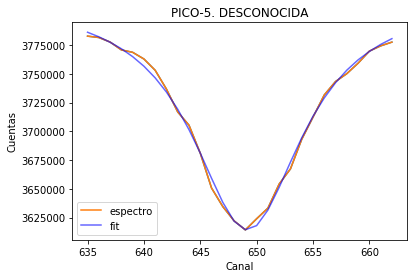

centro del pico = 649.1811949352793 ± 0.0027026275509983676
El valor de la integral del pico es : 133250000.26439725


In [13]:
#PICO5 espectro desconocido, canales 635:663

desc5=desc.iloc[635:663,]

plt.plot(desc5.iloc[:,1],desc5.iloc[:,0])
plt.title("PICO-5. DESCONOCIDA")
x=desc5.iloc[:,1]
y=desc5.iloc[:,0]

def Lorentz(x, a, x0, b,c):   
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 648 , 6,-95000])

plt.plot(desc5.iloc[:,1],desc5.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))


#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
o=I[0]
print("El valor de la integral del pico es :",o) 


### Pico 6 de espectro desconocido: 

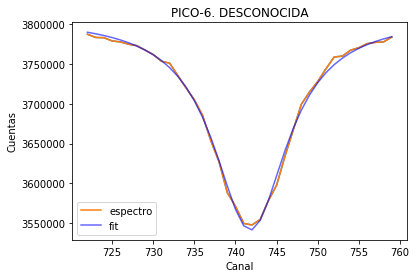

centro del pico = 741.7979932137172 ± 0.0019232491421361704
El valor de la integral del pico es : 121188826.72211005


In [55]:
# PICO6 espectro desconocido , canales 277:327


desc6=desc.iloc[722:760,]

plt.plot(desc6.iloc[:,1],desc6.iloc[:,0])
plt.title("PICO-6. DESCONOCIDA")
x=desc6.iloc[:,1]
y=desc6.iloc[:,0]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0=centro,b=ancho,c= para levantar la funcion
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[100000, 741 , 5,-95000])

plt.plot(desc6.iloc[:,1],desc6.iloc[:,0],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.plot(x, Lorentz(x, *popt), 'b-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()


print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#CALCULAMOS LA INTEGRAL DEL PICO

def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
p=I[0]
print("El valor de la integral del pico es :",p) 

In [56]:
#SUMA DE TODAS LAS INTEGRALES DE TODOS LOS PICOS

k=(q+w+e+r+t+l+u+i+o+p)



## Calibracion:

[352.868998  417.59267   482.25      531.0935182 595.970895  660.870073 ]


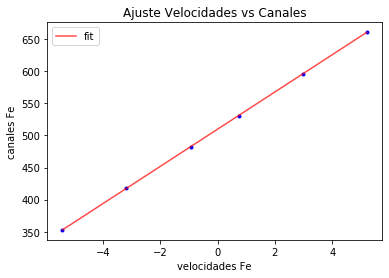

pendiente=28.993590233478333 , ordenada=509.847679598286


In [33]:
#CALIBRACION

velocidades= np.array([-5.418,
-3.182,
-0.946,
0.734,
2.97,
5.206])

canales=np.array([352.868998,
417.59267,
482.25,
531.0935182,
595.970895,
660.870073])

# canales=canales[::-1]

print(canales)


def lineal(velocidades,m,b):
    return m*velocidades+b
popt,pcov= curve_fit(lineal,velocidades,canales,p0=[3,500])
plt.plot(velocidades,canales,"b.")
plt.plot(velocidades,lineal(velocidades,*popt),"r-", label="fit",alpha=0.7)
plt.legend()
plt.xlabel("velocidades Fe")
plt.ylabel("canales Fe")
plt.title("Ajuste Velocidades vs Canales")
plt.show()


print("pendiente="+str(popt[0]),", ordenada="+str(popt[1]))